In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
#Importing the data
data = pd.read_csv(r'C:/Users/laks0/Documents/GitHub/Springboard/Capstone 1/train_users_2.csv', index_col=None)
data.head(10)

,id,secs_elapsed,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,NaN,2010-06-28,2.010000e+13,NaN,-unknown-,NaN,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,NaN,2011-05-25,2.010000e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,NaN,2010-09-28,2.010000e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,NaN,2011-12-05,2.010000e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,NaN,2010-09-14,2.010000e+13,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,NaN,2010-01-01,2.010000e+13,2010-01-02,-unknown-,NaN,basic,0.0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,NaN,2010-01-02,2.010000e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,NaN,2010-01-03,2.010000e+13,2010-01-13,FEMALE,47.0,basic,NaN,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,NaN,2010-01-04,2.010000e+13,2010-07-29,FEMALE,50.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,NaN,2010-01-04,2.010000e+13,2010-01-04,-unknown-,46.0,basic,0.0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
#Converting in to a dataframe & inital analysis of missing values, we see that date of first booking, age and first affliate
# tracked have the most missing values
df = pd.DataFrame(data)
len(df) - df.count()

id                              0
secs_elapsed               197951
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     1
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [5]:
print(df.language.unique())
print(df.country_destination.unique())
print(df.first_affiliate_tracked.unique())
print(df.affiliate_provider.unique())
print(df.signup_app.unique())
print(df.first_device_type.unique())
print(df.first_browser.unique())
print(df.signup_method.unique())
print(df.gender.unique())

['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
['Web' 'Moweb' 'iOS' 'Android']
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser'

3950


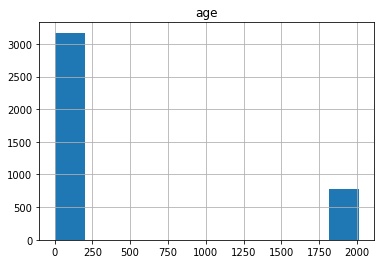

In [6]:
#There are people representing ages below 18 who are ineligible to do a booking on Airbnb,
#We also assumed that people above the age of 70 would not be potential tourists
dfcv = data
dfcv = dfcv[(dfcv.age > 70)|(dfcv.age < 18)]
dfcv.hist(column='age')
print(len(dfcv))

121511


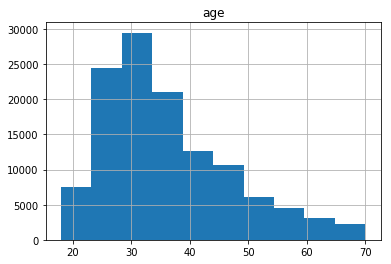

In [7]:
#Counting & Plotting data for ages between 18 to 70 as people under 18 cannot book a vacation and people above the age of 70 
# are unlikely to go on one
dfcv = data
dfcv = dfcv[(dfcv.age != '')]
dfcv = dfcv[(dfcv.age <= 70)]
dfcv = dfcv[(dfcv.age >= 18)]
dfcv.hist(column='age')
print(len(dfcv))

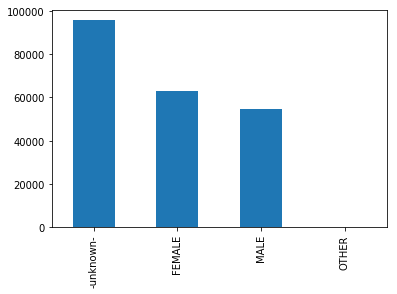

In [8]:
#Visualizing the data for all genders
# Unknown gender seems to be leading the charts followed by females and males, Classic case of 'data not missing at random'.
dfg = data
dfg = data['gender'].value_counts().plot(kind='bar')

In [9]:
import copy
%matplotlib inline

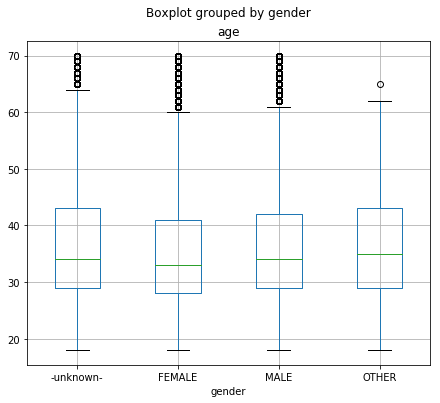

In [10]:
#Comparing Gender versus Age group, we observed that the median age group is around 32 to 35 but are different distributions
#Females, Males & Unknown have pointers which are 1.5 times the upper quartile
#25% of data for Females & Males is greater than the age of 60 & 62 respectively while unknown & Other have an age of 
#63 & 65
a = pd.read_csv('C:/Users/laks0/Documents/GitHub/Springboard/Capstone 1/train_users_2.csv', index_col=None)
acd = a[['age', 'gender']]
acd = acd[np.isfinite(acd['age'])]
acd = acd[acd.age >= 18]
acd = acd[acd.age <= 70]
acd.boxplot('age', 'gender', figsize=(7,6))

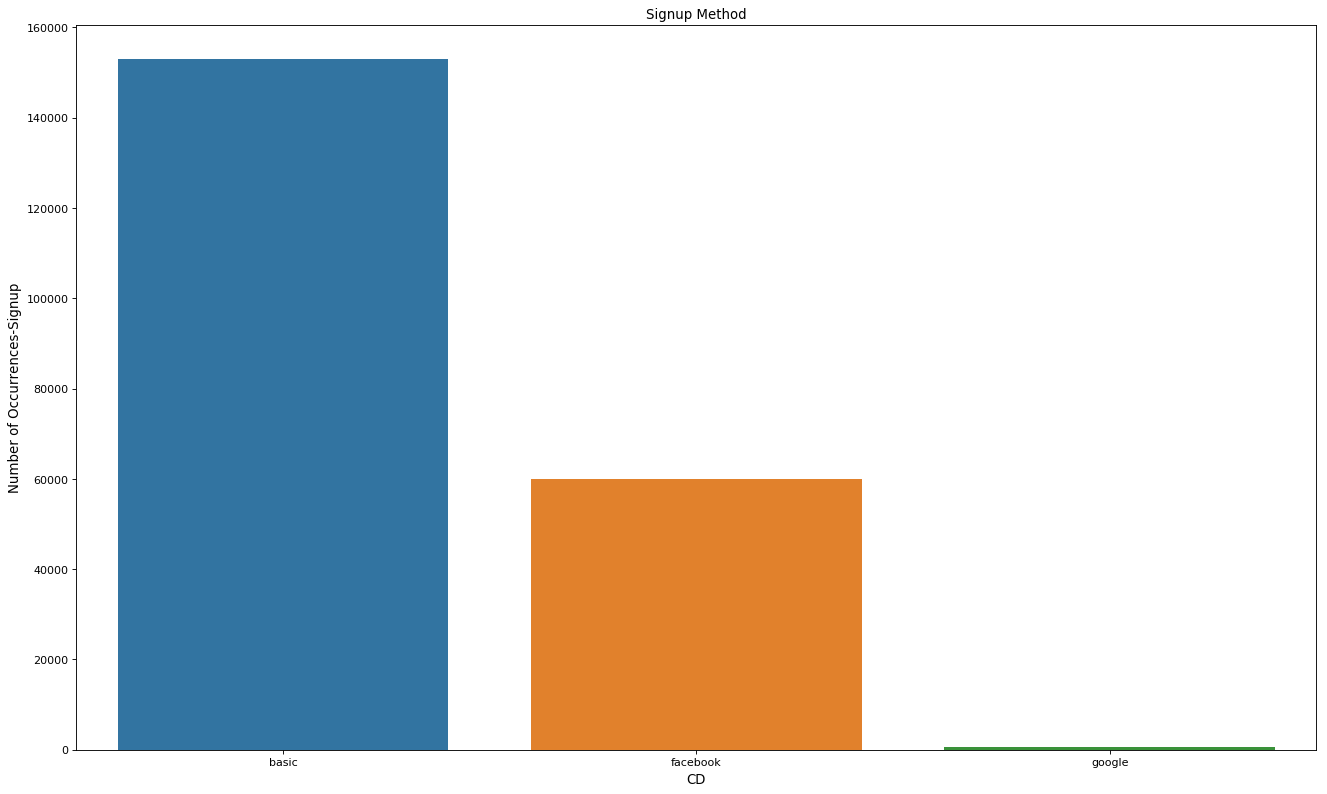

In [11]:
#Signup Method versus Country of destination
#We observed that basic signup method was used for sign up for most of the countries 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scd = a[['signup_method', 'country_destination']]
signup_count = scd['signup_method'].value_counts()
country_count = scd['country_destination'].value_counts()
sns.barplot(signup_count.index, signup_count.values)
plt.title('Signup Method')
plt.ylabel('Number of Occurrences-Signup', fontsize=12)
plt.xlabel('CD', fontsize=12)
plt.show()

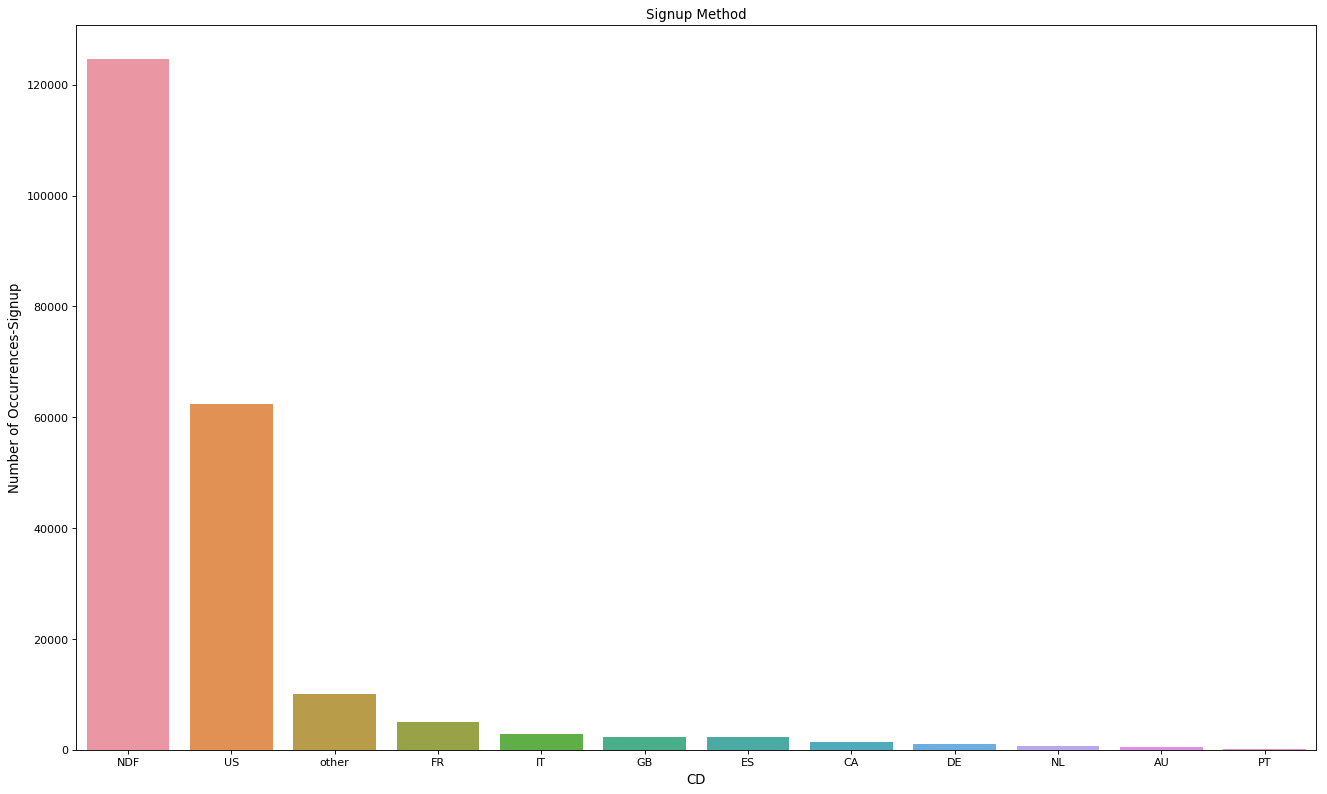

In [12]:
#Country of Destination versus age
#We observed that most of the age group chose no destination followed by the US and other
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scd = a[['age', 'country_destination']]
cd_count = scd['country_destination'].value_counts()
age_count = scd['age'].value_counts()
sns.barplot(cd_count.index, cd_count.values)
plt.title('Signup Method')
plt.ylabel('Number of Occurrences-Signup', fontsize=12)
plt.xlabel('CD', fontsize=12)
plt.show()

In [13]:
age_b = pd.read_csv(r'C:\Users\laks0\Documents\GitHub\Springboard\Capstone 1\age_bkts.csv')
age_b.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,15-19,AU,male,768,2015
1,15-19,AU,female,737,2015
2,15-19,CA,male,1054,2015
3,15-19,CA,female,1009,2015
4,15-19,DE,male,2076,2015


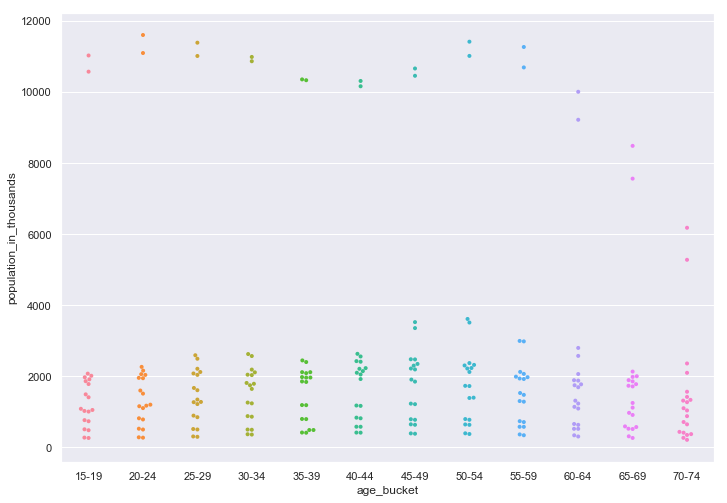

In [125]:
#Plotting the no. of people based on age range, we can see that the age group of 20-24,25-29 & 50-54 have the highest no. of people
# interested in going for a vacation
sns.set(rc={'figure.figsize':(11.7,8.27)})
agebplot = sns.swarmplot(x='age_bucket', y='population_in_thousands', data=age_b, size = 4)

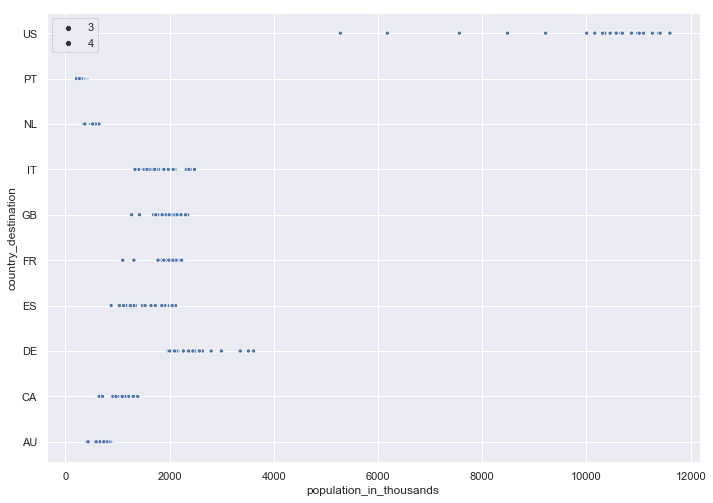

In [139]:
#Plotting the countries most people are interested in going to for a vacation; US clearly is the winner here followed by 
# netherlands & Italy
sns.set(rc={'figure.figsize':(11.7,8.27)})
countryplot = sns.scatterplot(x='population_in_thousands', y='country_destination', data=age_b, size = 4)

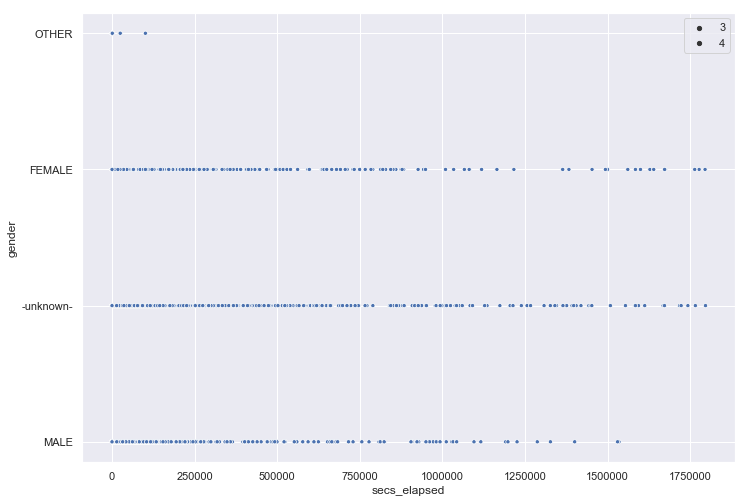

In [14]:
#Plotting the gender vs time spent on the website, Female & Unknown genders seem to be spending most amount of time browsing
sns.set(rc={'figure.figsize':(11.7,8.27)})
timeplot = sns.scatterplot(x='secs_elapsed', y='gender', data=data, size = 4)